[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


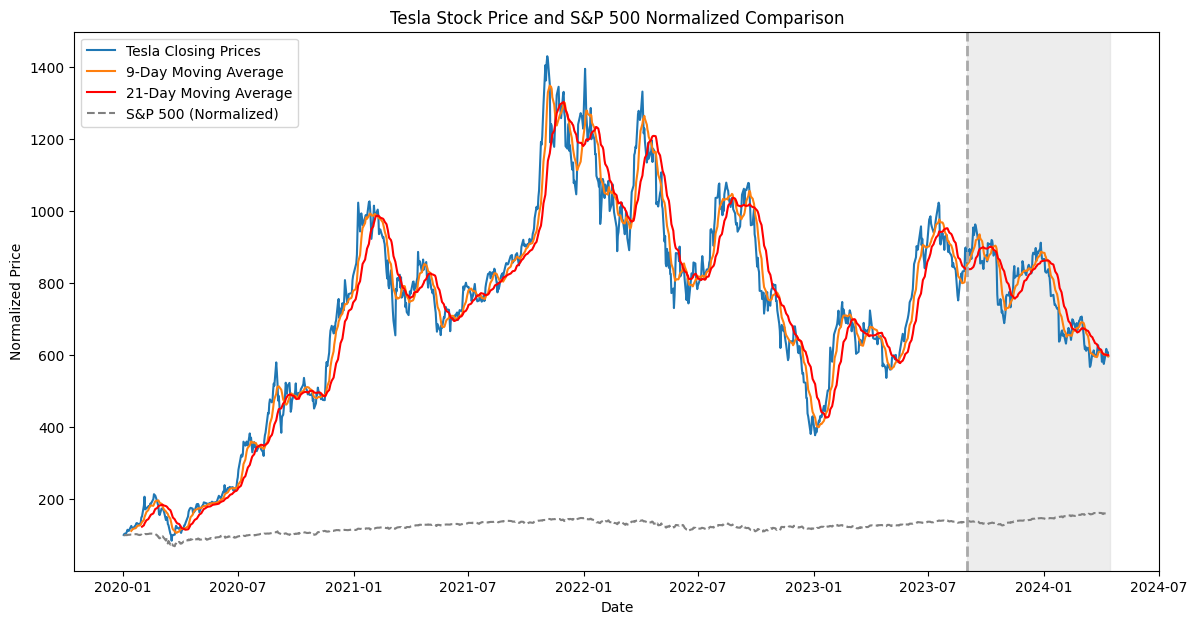

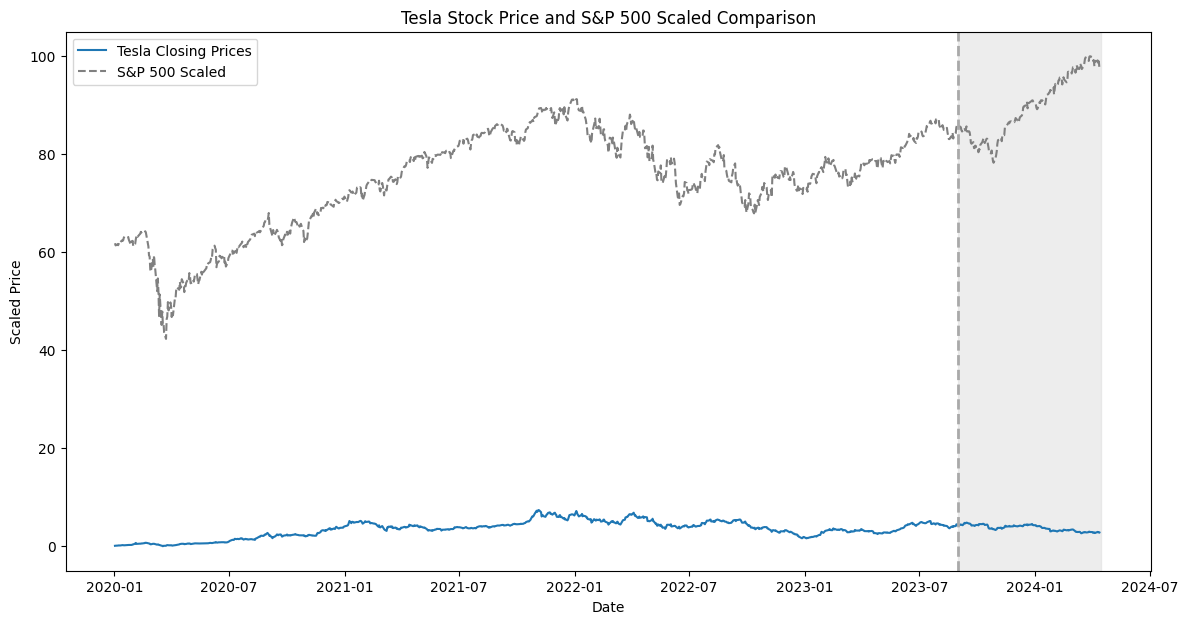

[*********************100%%**********************]  1 of 1 completed


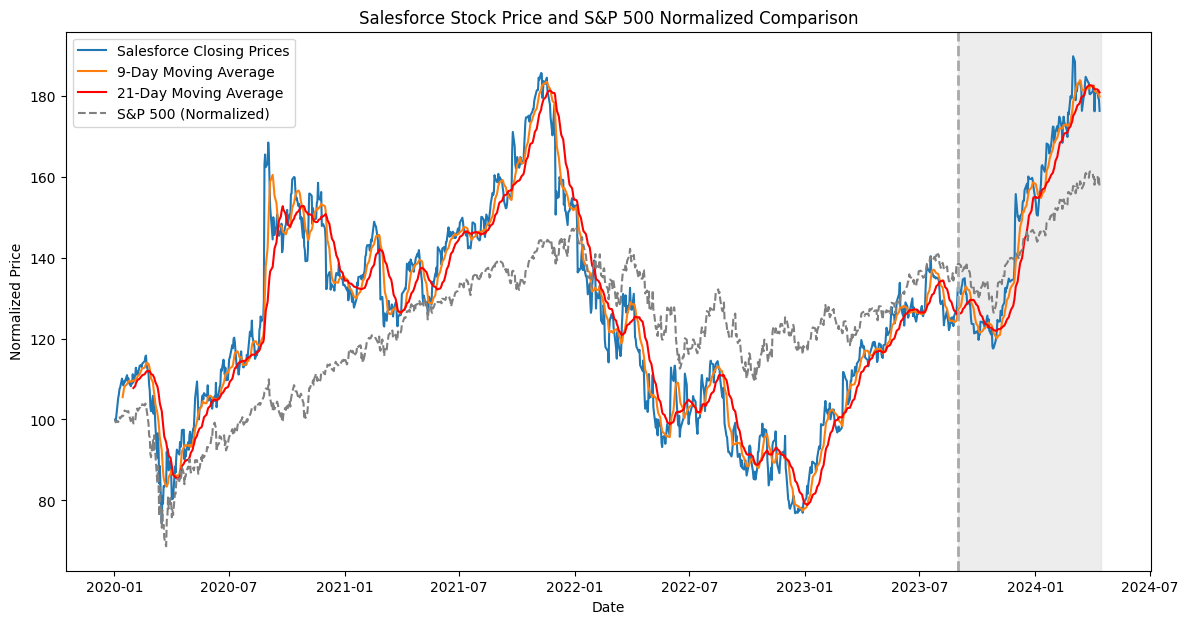

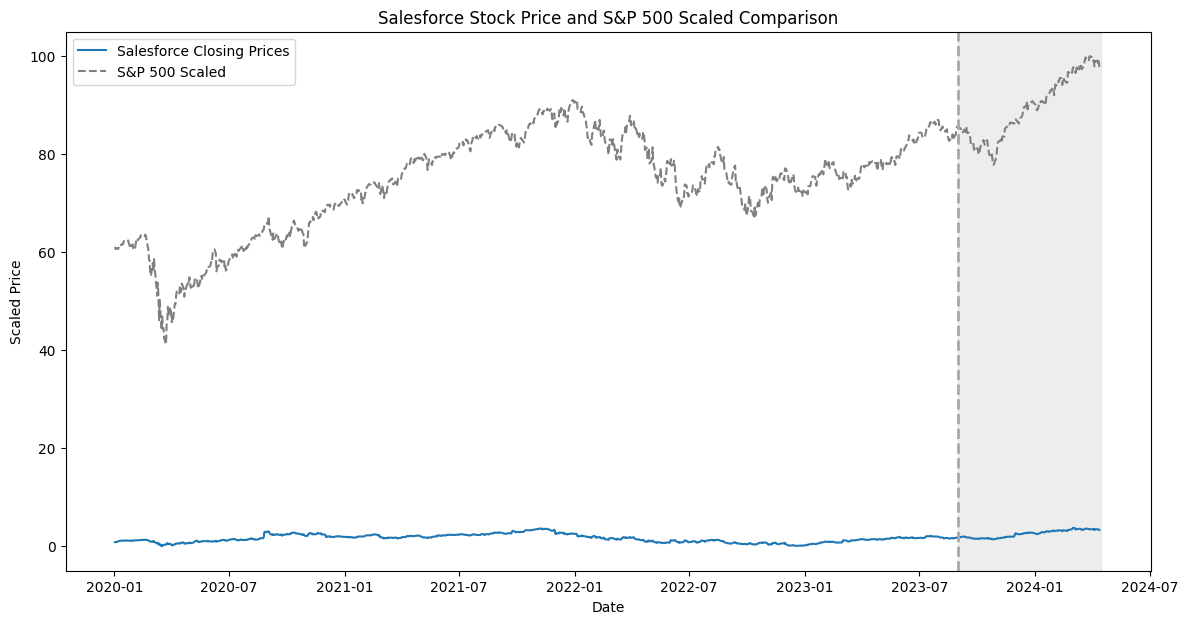

[*********************100%%**********************]  1 of 1 completed


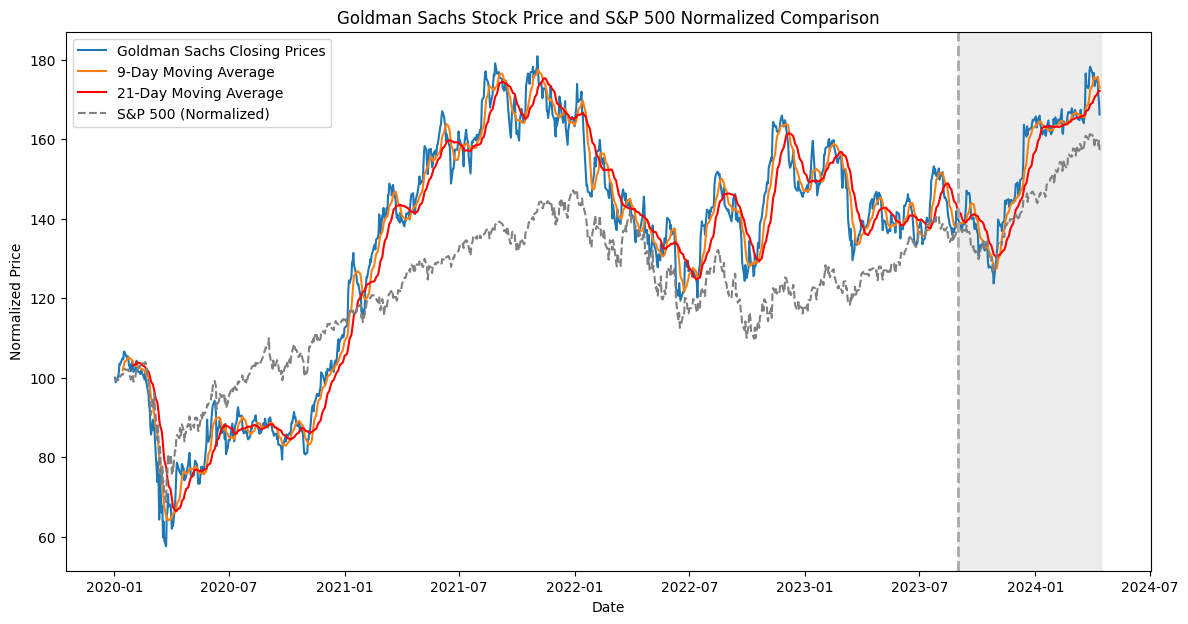

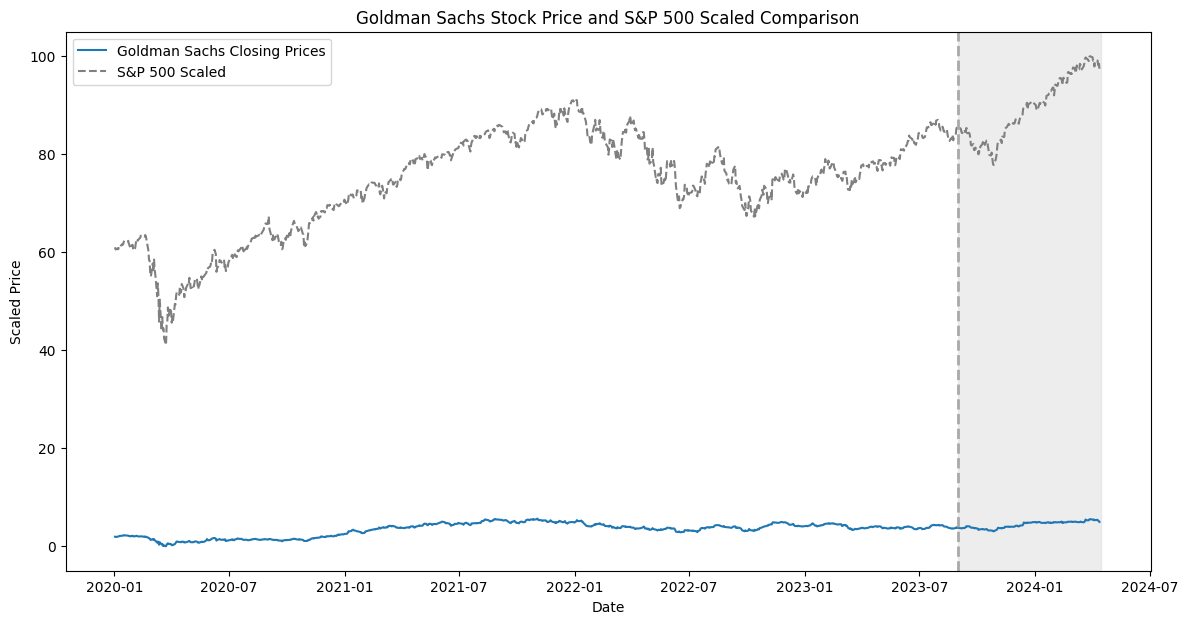

[*********************100%%**********************]  1 of 1 completed


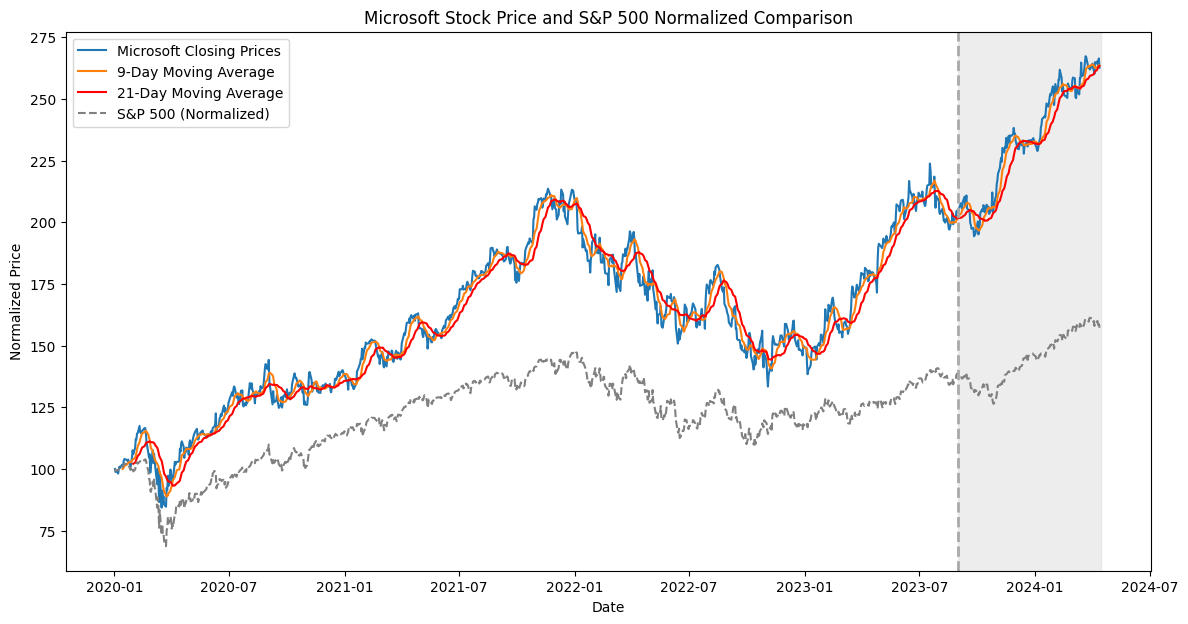

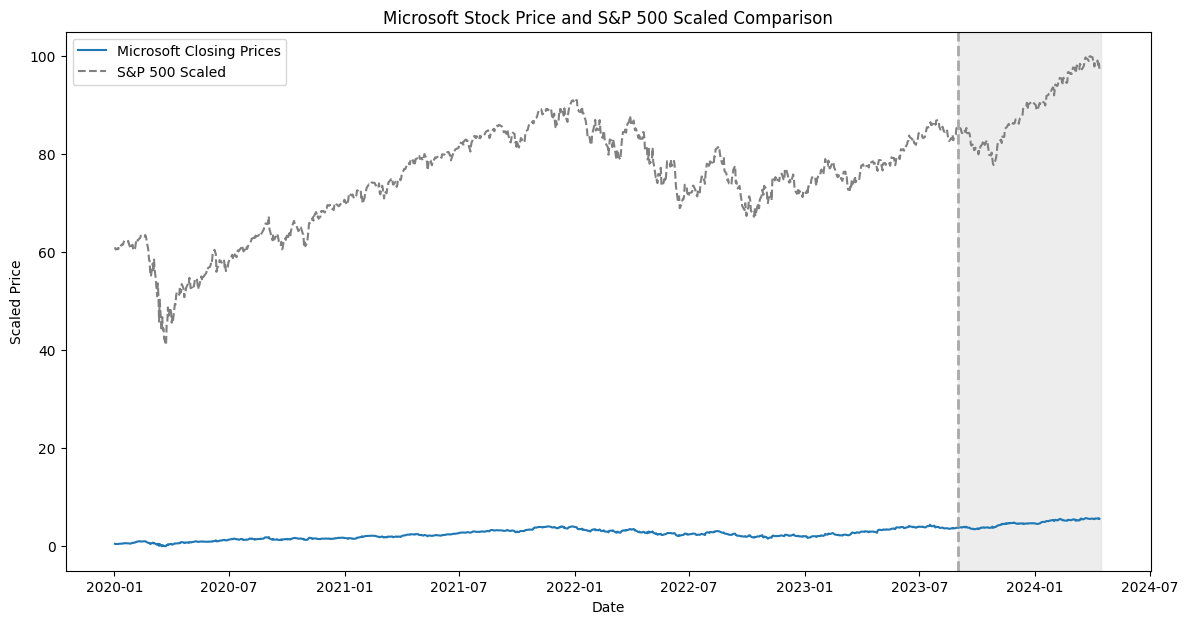

[*********************100%%**********************]  1 of 1 completed


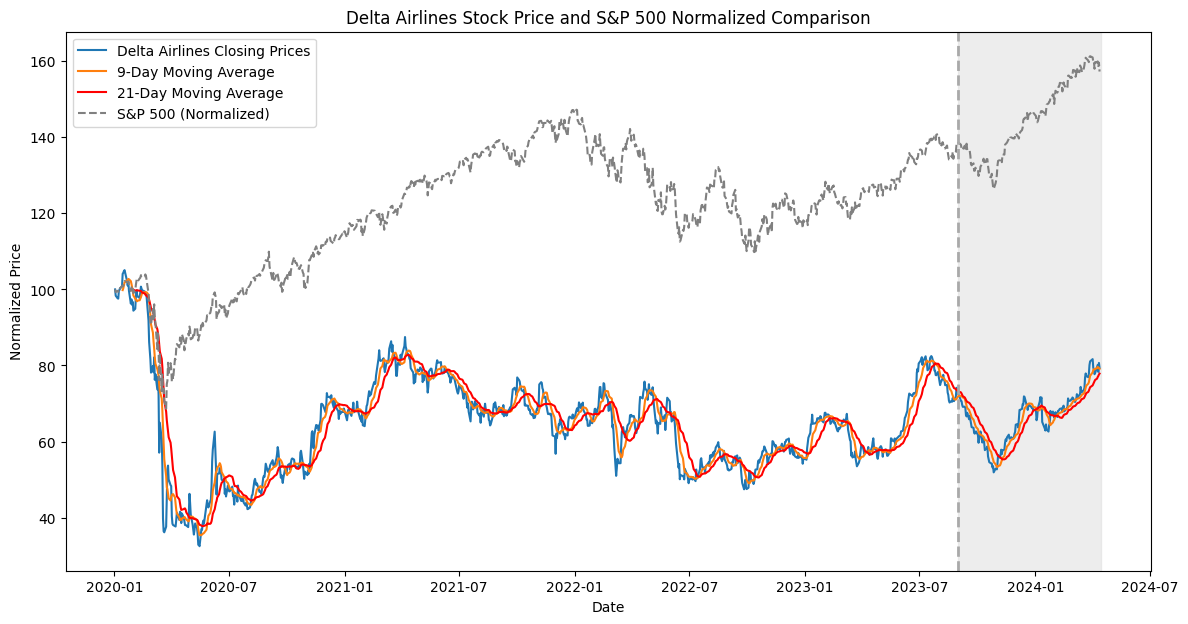

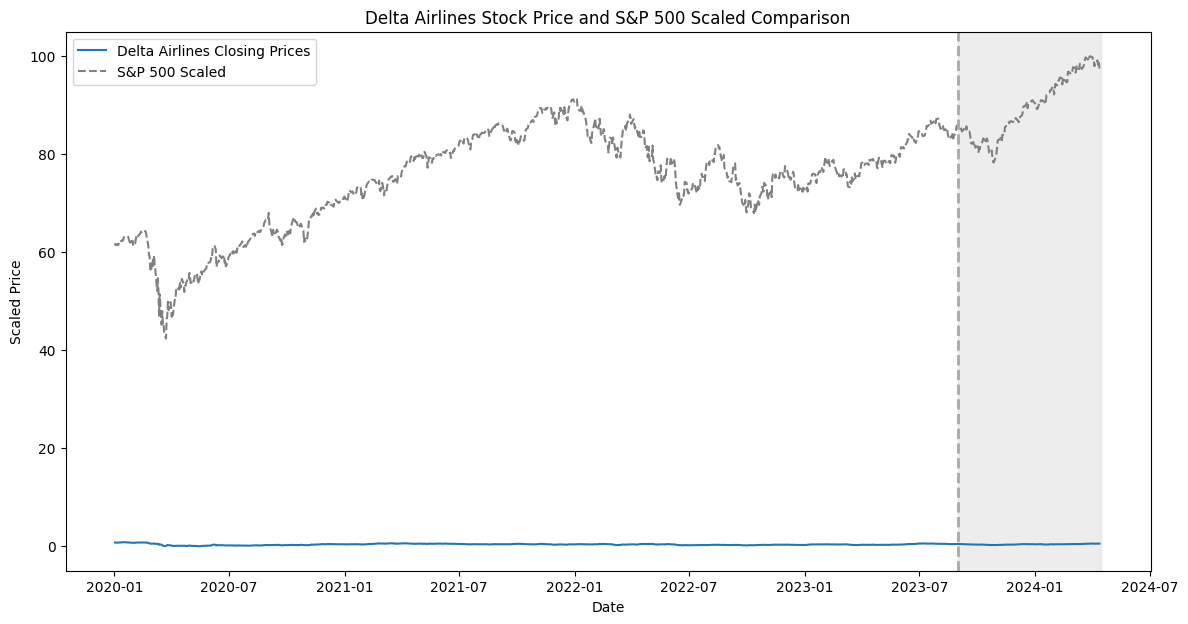

[*********************100%%**********************]  1 of 1 completed


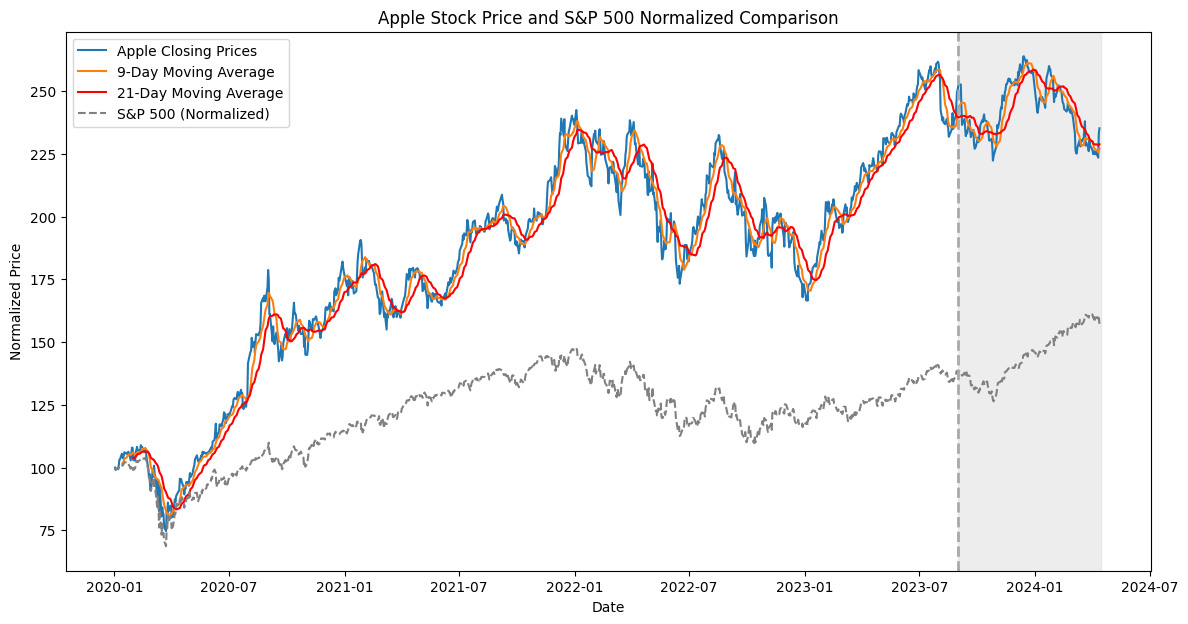

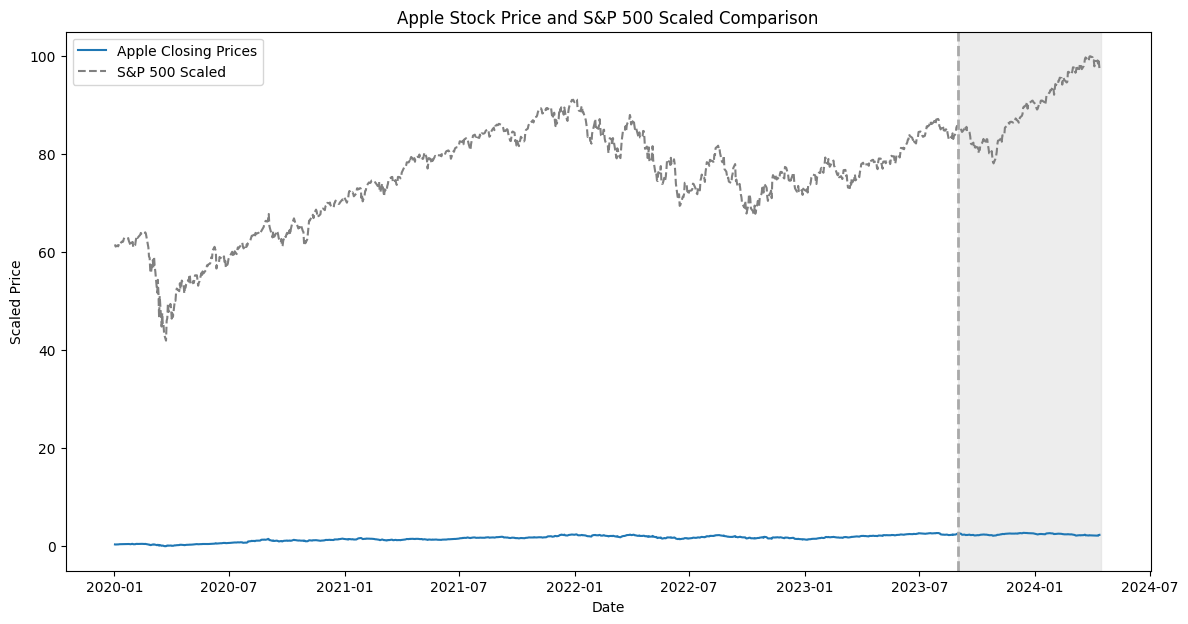

[*********************100%%**********************]  1 of 1 completed


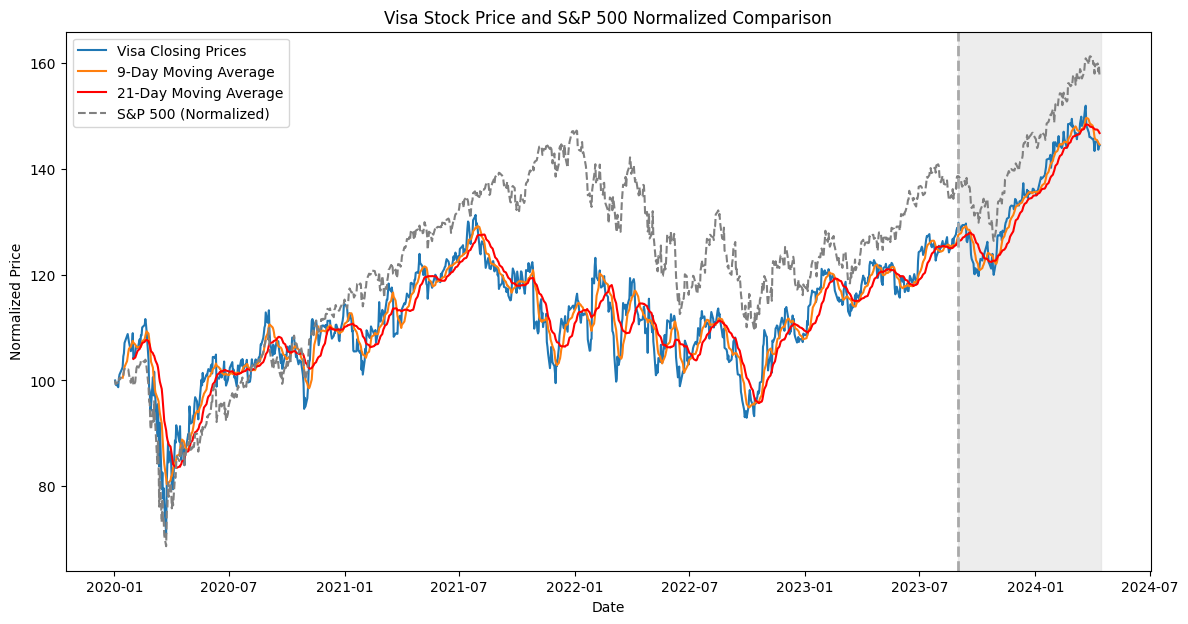

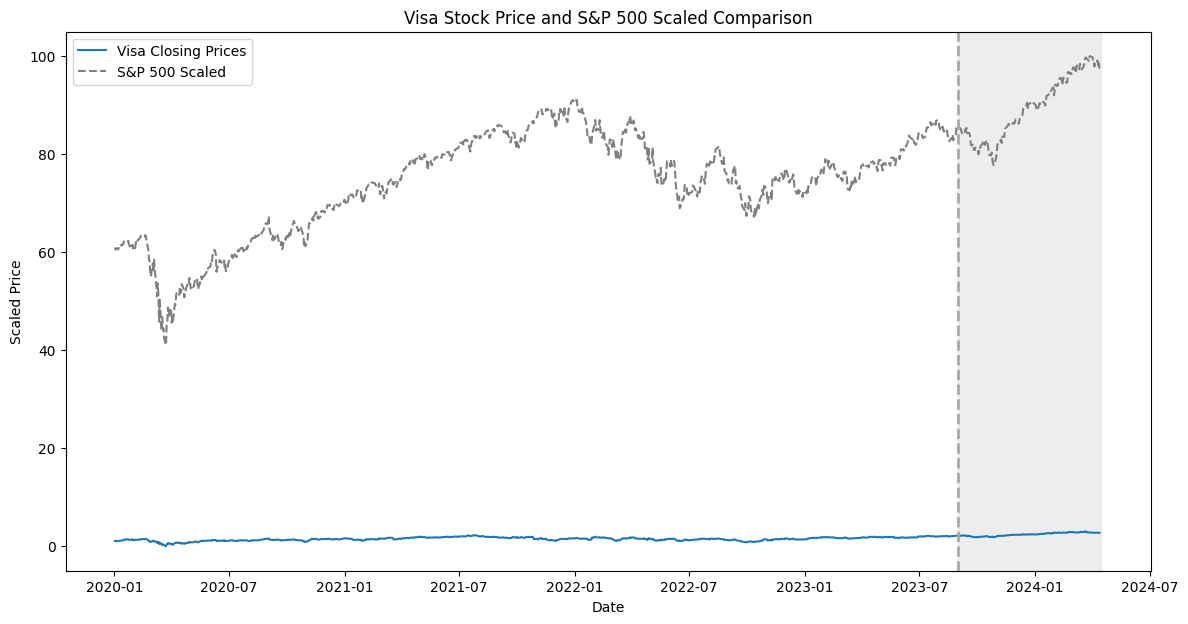

[*********************100%%**********************]  1 of 1 completed


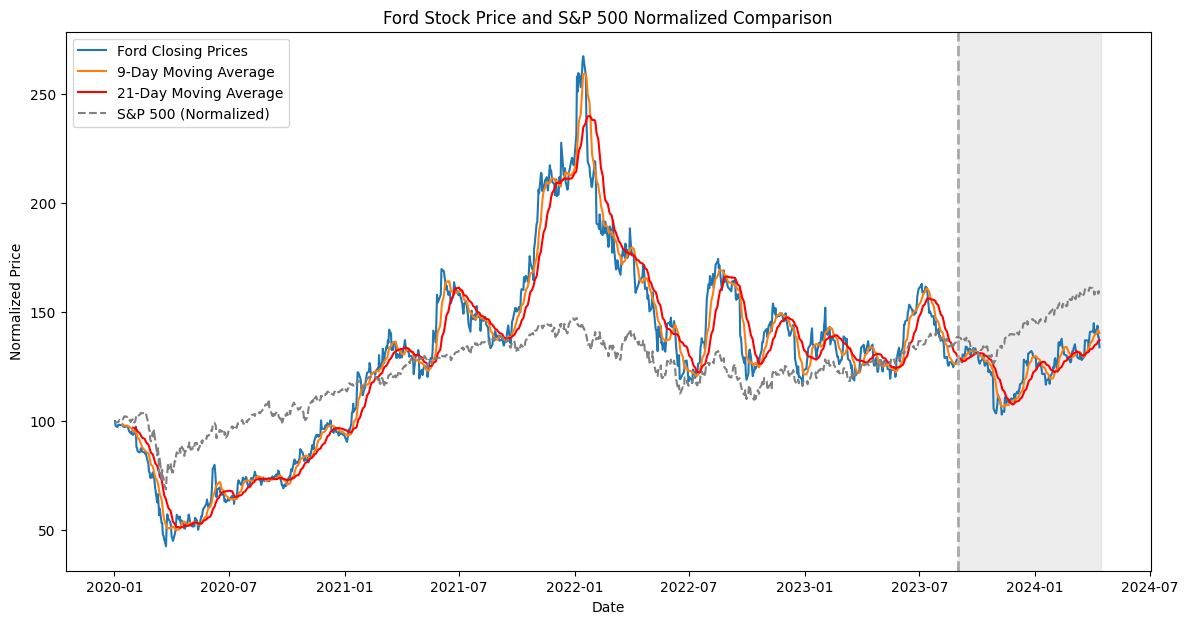

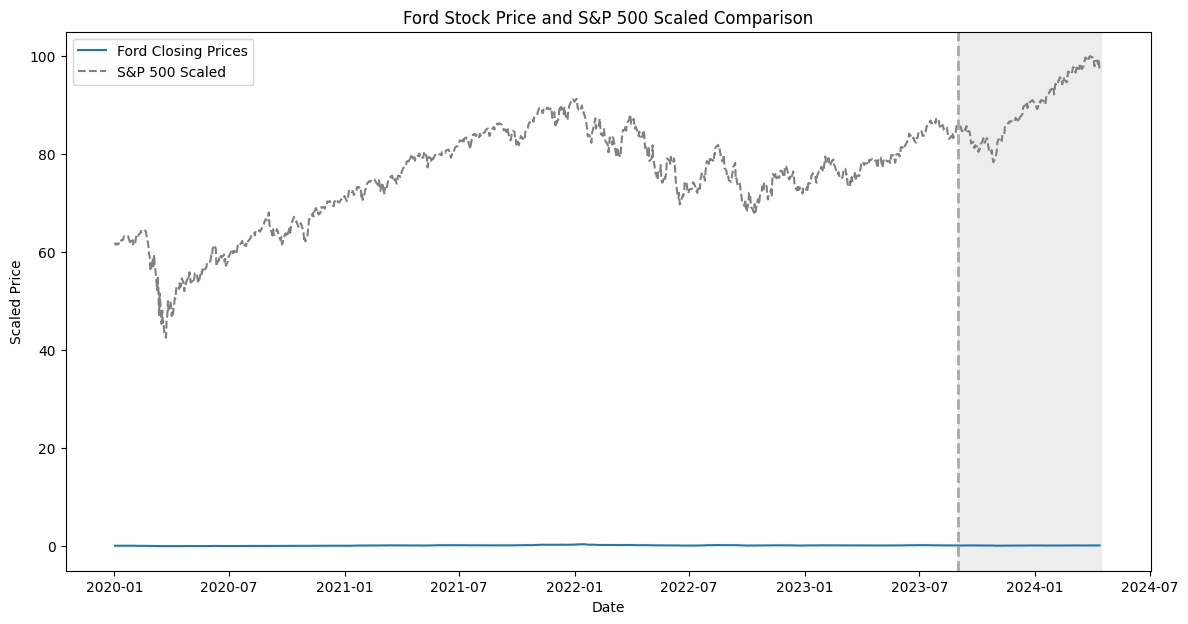

[*********************100%%**********************]  1 of 1 completed


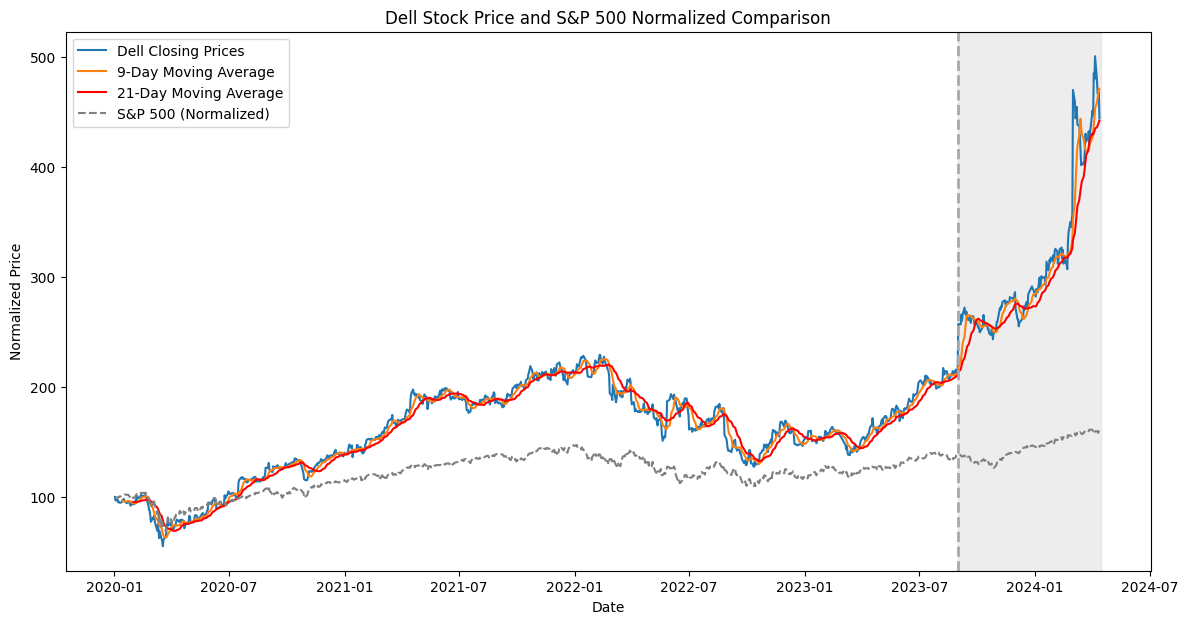

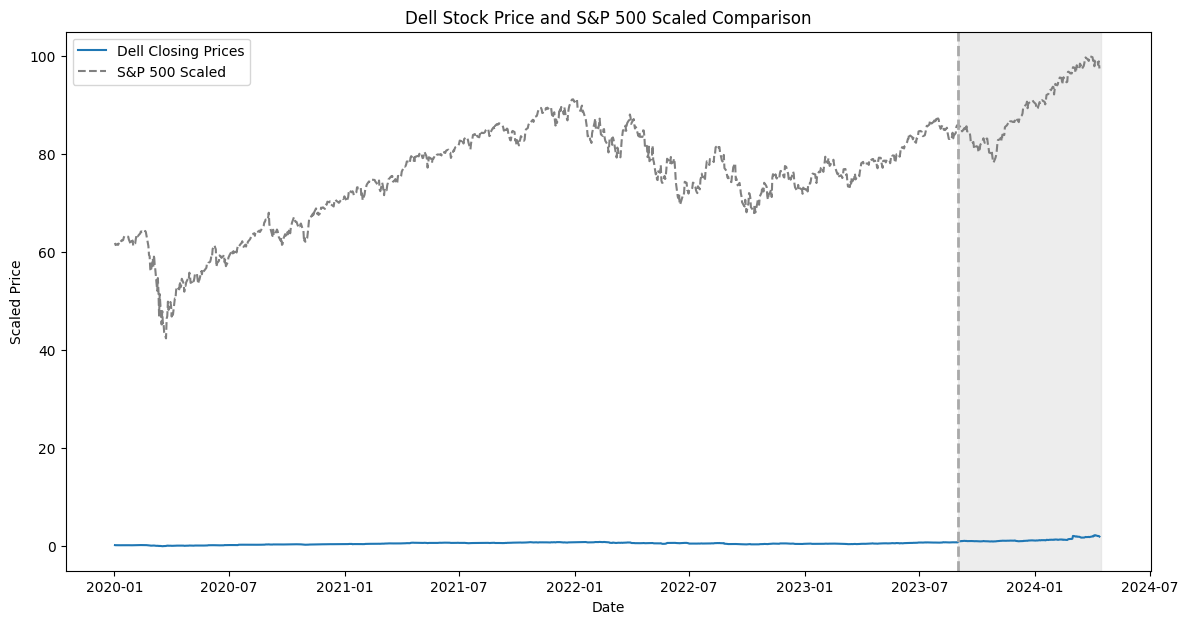

[*********************100%%**********************]  1 of 1 completed


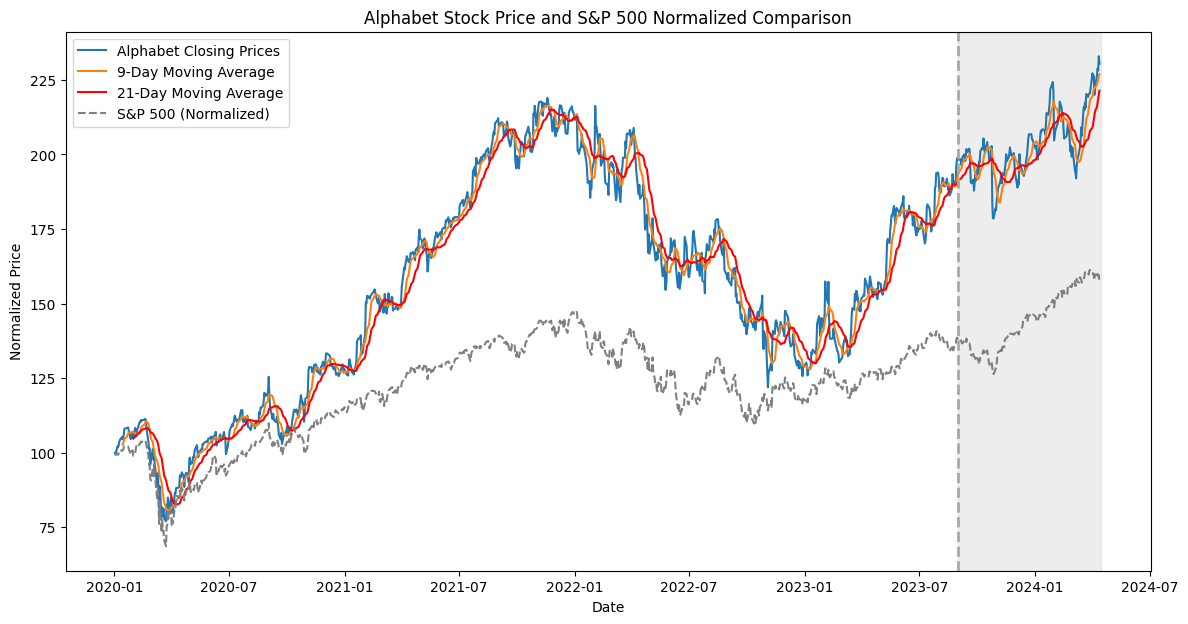

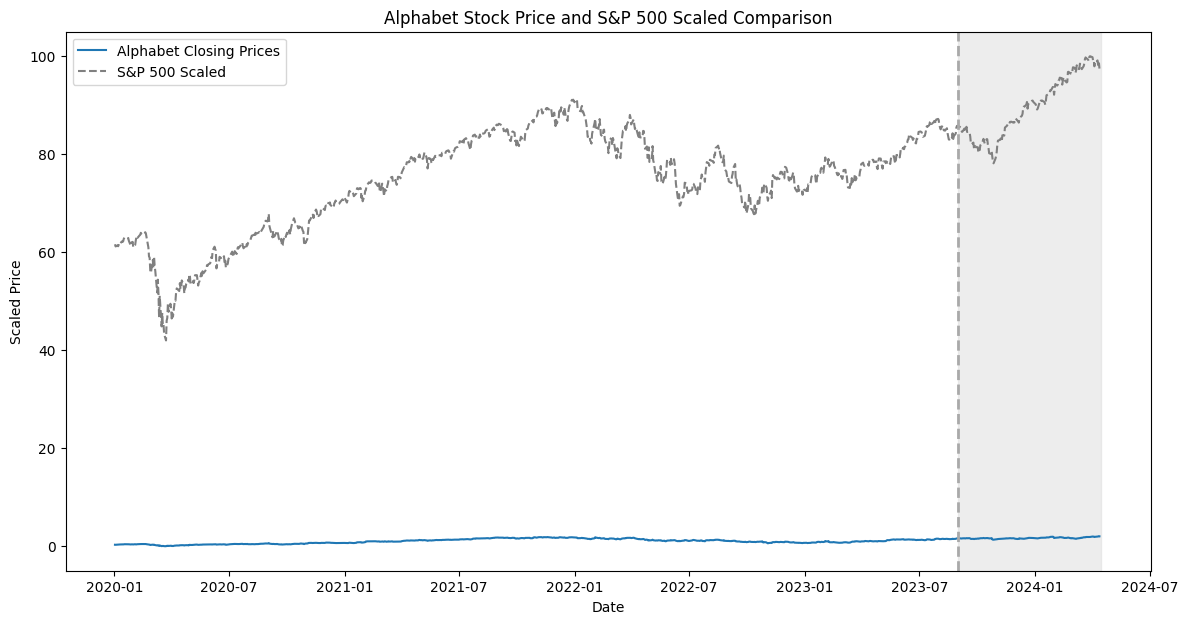

In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# Define the start and end dates
start_date = datetime(2020, 1, 1)
end_date = datetime(2024, 4, 15)

# Define the companies and their tickers
companies = {
    'TSLA': 'Tesla',
    'CRM': 'Salesforce',
    'GS': 'Goldman Sachs',
    'MSFT': 'Microsoft',
    'DAL': 'Delta Airlines',
    'AAPL': 'Apple',
    'V': 'Visa',
    'F': 'Ford',
    'DELL': 'Dell',
    'GOOGL': 'Alphabet'
}

# Download S&P 500 index data
sp500_data = yf.download('^GSPC', start=start_date, end=end_date)['Close']

# Normalize S&P 500 data for comparison
sp500_normalized = (sp500_data / sp500_data.iloc[0]) * 100

# Define the significant date
significant_date = datetime(2023, 9, 1)

# Loop through each company, download the data, calculate moving averages, and plot
for ticker, name in companies.items():
    # Download stock data
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    
    # Normalize stock data for comparison
    stock_data['Normalized'] = (stock_data['Close'] / stock_data['Close'].iloc[0]) * 100
    
    # Scaled stock data and S&P 500 for direct comparison
    min_price = min(stock_data['Close'].min(), sp500_data.min())
    max_price = max(stock_data['Close'].max(), sp500_data.max())
    stock_data['Scaled'] = 100 * (stock_data['Close'] - min_price) / (max_price - min_price)
    sp500_scaled = 100 * (sp500_data - min_price) / (max_price - min_price)
    
    # Calculate moving averages on the normalized prices
    stock_data['MA9'] = stock_data['Normalized'].rolling(window=9).mean()
    stock_data['MA21'] = stock_data['Normalized'].rolling(window=21).mean()
    
    # Plotting Normalized Data
    plt.figure(figsize=(14, 7))
    plt.plot(stock_data['Normalized'], label=f'{name} Closing Prices')
    plt.plot(stock_data['MA9'], label='9-Day Moving Average')
    plt.plot(stock_data['MA21'], label='21-Day Moving Average', color='red')
    plt.plot(sp500_normalized, label='S&P 500 (Normalized)', linestyle='--', color='gray')
    plt.axvline(x=significant_date, color='darkgrey', linestyle='--', lw=2)
    plt.axvspan(significant_date, end_date, color='gainsboro', alpha=0.5)
    plt.title(f'{name} Stock Price and S&P 500 Normalized Comparison')
    plt.xlabel('Date')
    plt.ylabel('Normalized Price')
    plt.legend()
    plt.grid(False)
    plt.savefig(f'{name}_normalized_comparison.png', format='png', dpi=300)
    plt.show()

    # Plotting Scaled Data
    plt.figure(figsize=(14, 7))
    plt.plot(stock_data['Scaled'], label=f'{name} Closing Prices')
    plt.plot(sp500_scaled, label='S&P 500 Scaled', linestyle='--', color='gray')
    plt.axvline(x=significant_date, color='darkgrey', linestyle='--', lw=2)
    plt.axvspan(significant_date, end_date, color='gainsboro', alpha=0.5)
    plt.title(f'{name} Stock Price and S&P 500 Scaled Comparison')
    plt.xlabel('Date')
    plt.ylabel('Scaled Price')
    plt.legend()
    plt.grid(False)
    #plt.savefig(f'{name}_scaled_comparison.png', format='png', dpi=300)
    plt.show()

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


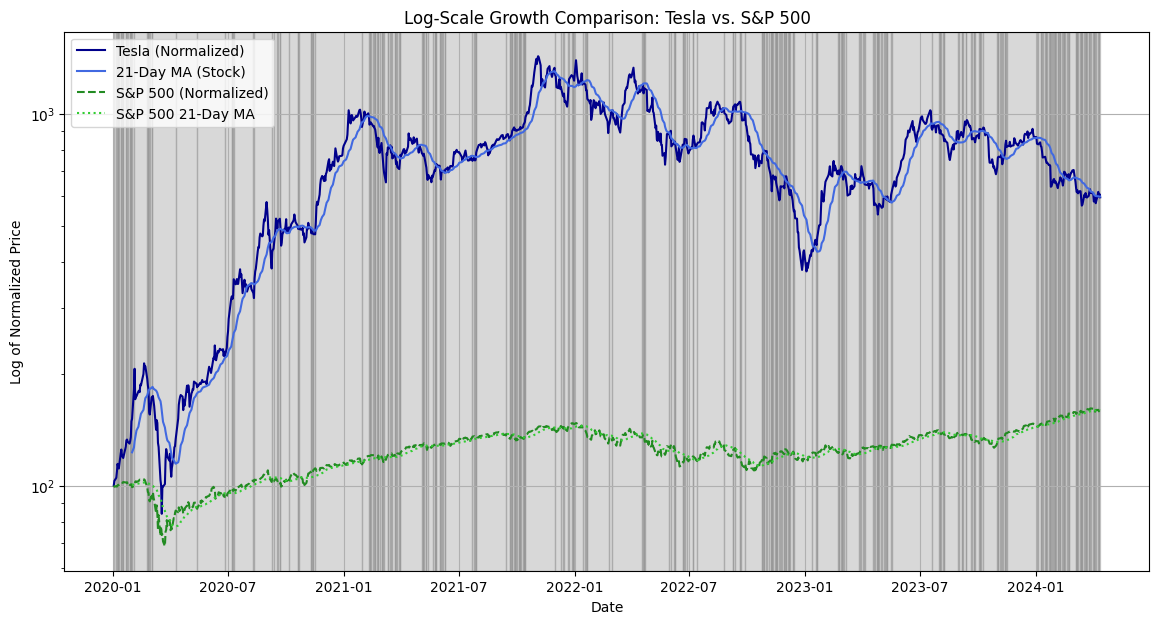

[*********************100%%**********************]  1 of 1 completed


<Figure size 640x480 with 0 Axes>

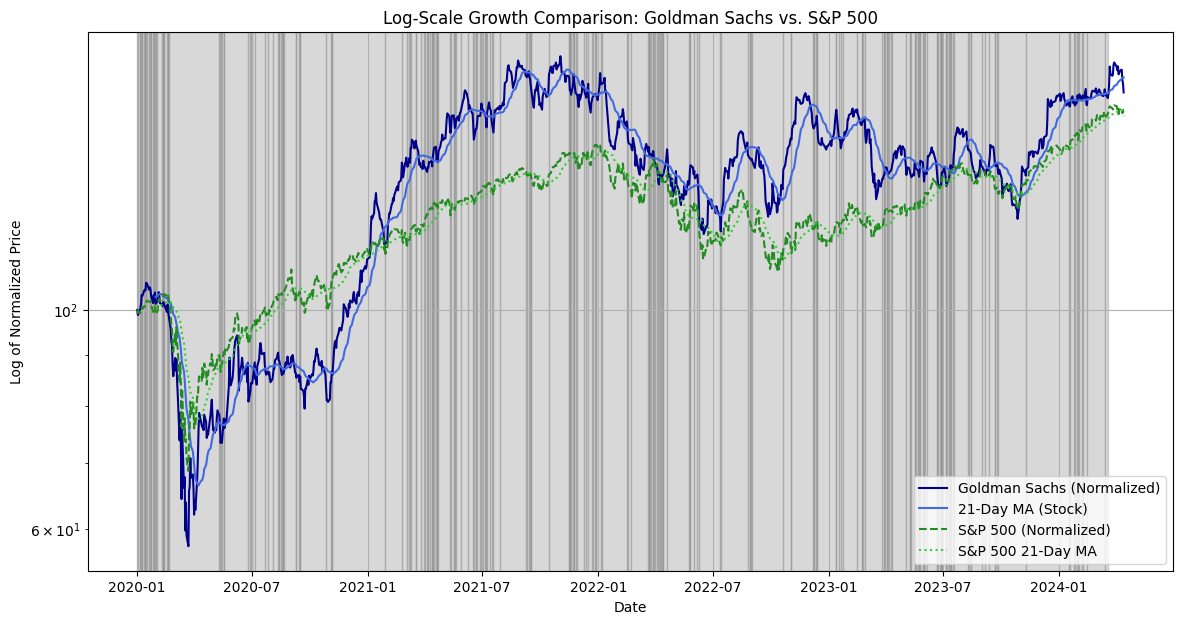

[*********************100%%**********************]  1 of 1 completed


<Figure size 640x480 with 0 Axes>

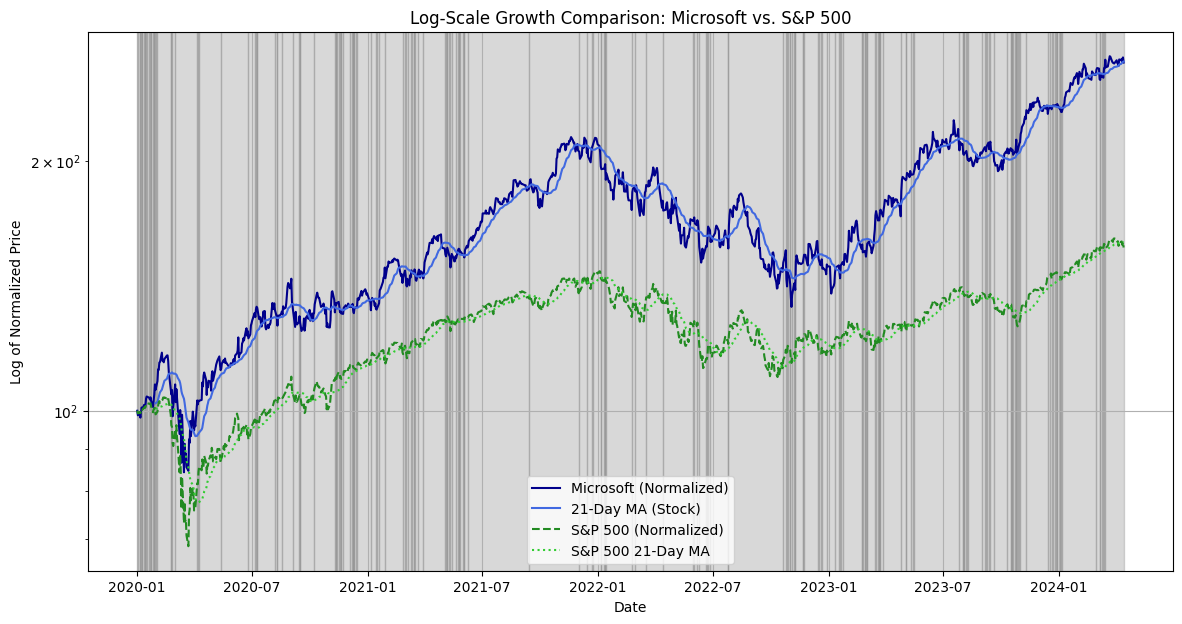

[*********************100%%**********************]  1 of 1 completed


<Figure size 640x480 with 0 Axes>

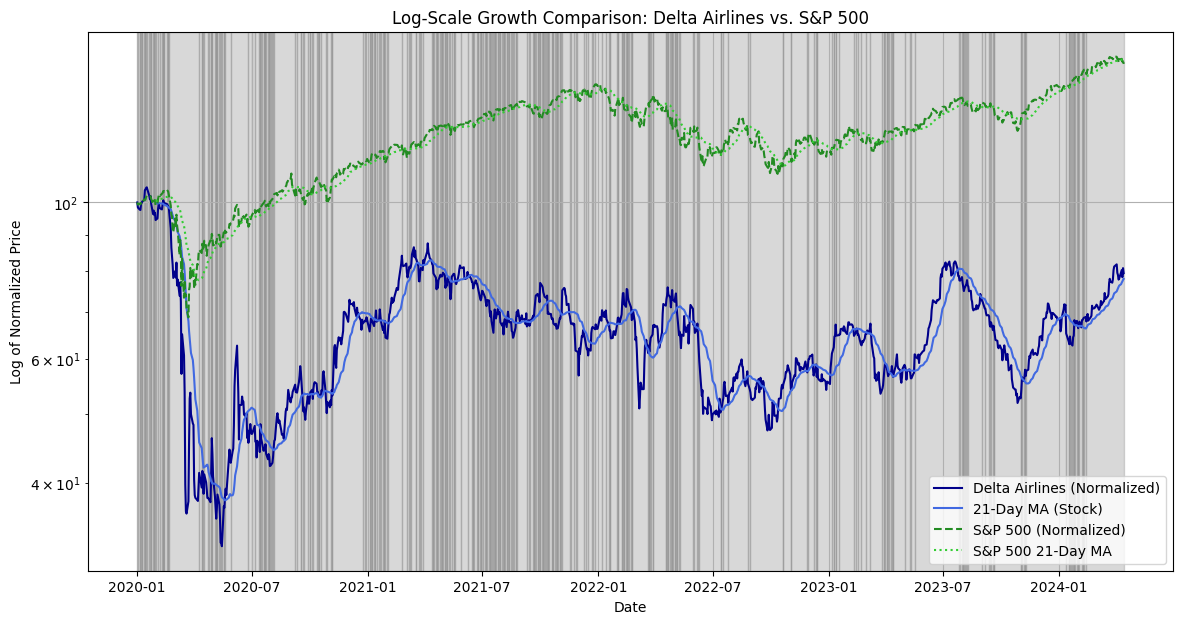

[*********************100%%**********************]  1 of 1 completed


<Figure size 640x480 with 0 Axes>

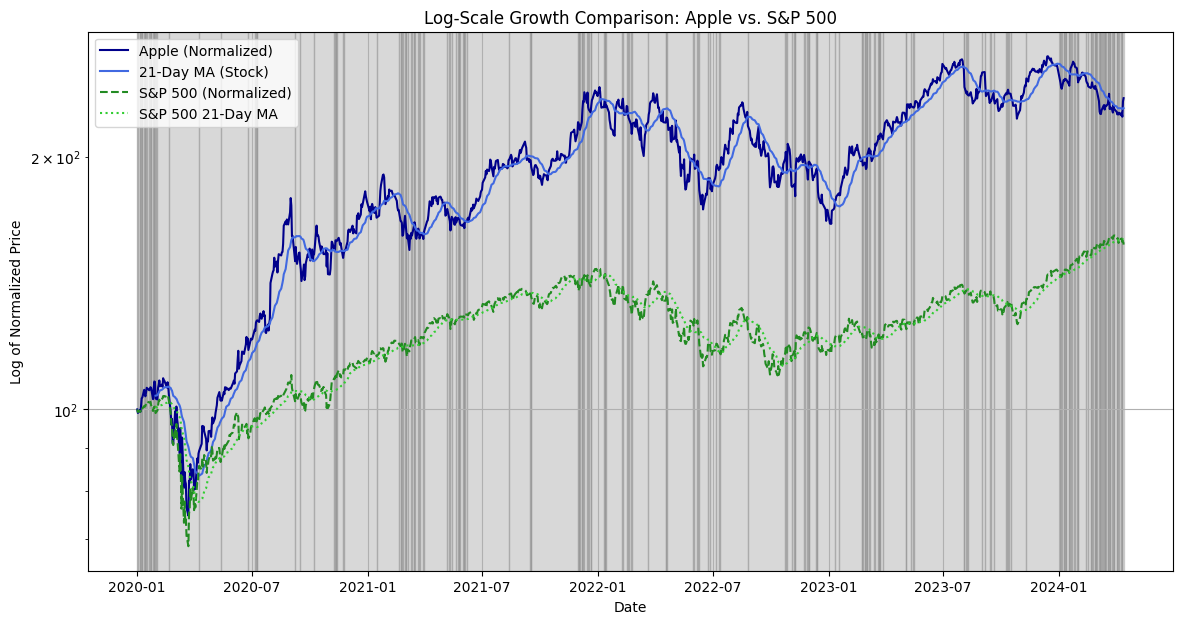

<Figure size 640x480 with 0 Axes>

In [3]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np

# Define the start and end dates
start_date = datetime(2020, 1, 1)
end_date = datetime(2024, 4, 15)

# Define the companies and their tickers
companies = {
    'TSLA': 'Tesla',
    'GS': 'Goldman Sachs',
    'MSFT': 'Microsoft',
    'DAL': 'Delta Airlines',
    'AAPL': 'Apple',
}

# Download S&P 500 index data
sp500_data = yf.download('^GSPC', start=start_date, end=end_date)['Close']

# Normalize S&P 500 data for comparison
sp500_normalized = (sp500_data / sp500_data.iloc[0]) * 100
sp500_ma21 = sp500_normalized.rolling(window=21).mean()

# Loop through each company, download the data, calculate moving averages, and plot
for ticker, name in companies.items():
    # Download stock data
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    
    # Normalize stock data for comparison
    stock_data['Normalized'] = (stock_data['Close'] / stock_data['Close'].iloc[0]) * 100
    
    # Calculate moving averages
    stock_data['MA21'] = stock_data['Normalized'].rolling(window=21).mean()
    
    # Create a DataFrame for divergences
    diff = np.sign(stock_data['MA21'].diff()) != np.sign(sp500_ma21.diff())
    divergences = stock_data.index[diff]

    # Plotting with logarithmic scale
    plt.figure(figsize=(14, 7))
    plt.plot(stock_data.index, stock_data['Normalized'], label=f'{name} (Normalized)', color='darkblue')
    plt.plot(stock_data.index, stock_data['MA21'], label='21-Day MA (Stock)', color='royalblue')
    plt.plot(stock_data.index, sp500_normalized, label='S&P 500 (Normalized)', linestyle='--', color='forestgreen')
    plt.plot(stock_data.index, sp500_ma21, label='S&P 500 21-Day MA', linestyle=':', color='limegreen')
    
    # Highlight divergence periods with shaded areas
    previous_divergence = None
    for i, div in enumerate(divergences):
        if previous_divergence is not None:
            plt.axvspan(previous_divergence, div, color='grey', alpha=0.3)
        previous_divergence = div

    plt.yscale('log')
    plt.title(f'Log-Scale Growth Comparison: {name} vs. S&P 500')
    plt.xlabel('Date')
    plt.ylabel('Log of Normalized Price')
    plt.legend()
    plt.grid(True)
    plt.show()
    plt.savefig(f'{name}_log_comparison.png', format='png', dpi=300)
   

In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# Define the start and end dates
start_date = datetime(2020, 1, 1)
end_date = datetime(2024, 4, 15)

# Define the companies and their tickers
companies = {
    'TSLA': 'Tesla',
    'CRM': 'Salesforce',
    'GS': 'Goldman Sachs',
    'MSFT': 'Microsoft',
    'DAL': 'Delta Airlines',
    'AAPL': 'Apple',
    'V': 'Visa',
    'F': 'Ford',
    'DELL': 'Dell',
    'GOOGL': 'Alphabet'
}

# Download S&P 500 index data
sp500_data = yf.download('^GSPC', start=start_date, end=end_date)['Close']

# Normalize S&P 500 data for comparison
sp500_normalized = (sp500_data / sp500_data.iloc[0]) * 100

# Define the significant date
significant_date = datetime(2023, 9, 1)

# Loop through each company, download the data, calculate moving averages, and plot
for ticker, name in companies.items():
    # Download stock data
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    
    # Normalize stock data for comparison
    stock_data['Normalized'] = (stock_data['Close'] / stock_data['Close'].iloc[0]) * 100
    
    # Scaled stock data and S&P 500 for direct comparison
    min_price = min(stock_data['Close'].min(), sp500_data.min())
    max_price = max(stock_data['Close'].max(), sp500_data.max())
    stock_data['Scaled'] = 100 * (stock_data['Close'] - min_price) / (max_price - min_price)
    sp500_scaled = 100 * (sp500_data - min_price) / (max_price - min_price)
    
    # Calculate moving averages on the normalized prices
    stock_data['MA9'] = stock_data['Normalized'].rolling(window=9).mean()
    stock_data['MA21'] = stock_data['Normalized'].rolling(window=21).mean()
    
    # Plotting Normalized Data
    plt.figure(figsize=(14, 7))
    plt.plot(stock_data['Normalized'], label=f'{name} Closing Prices')
    plt.plot(sp500_normalized, label='S&P 500 (Normalized)', linestyle='--', color='gray')

    plt.title(f'{name} Stock Price and S&P 500 Normalized Comparison')
    plt.xlabel('Date')
    plt.ylabel('Normalized Price')
    plt.legend()
    plt.grid(False)
    plt.savefig(f'{name}_normalized_comparison.png', format='png', dpi=300)
    plt.show()


In [4]:
import yfinance as yf
import matplotlib.pyplot as plt

# Define the ticker symbol and the time period
ticker_symbol = 'TSLA'
start_date = '2020-01-01'
end_date = '2024-01-01'  # Adjust if necessary to fit the actual end date

# Download stock data from Yahoo Finance
tesla_data = yf.download(ticker_symbol, start=start_date, end=end_date)

# Check the first few rows of the data
print(tesla_data.head())

[*********************100%%**********************]  1 of 1 completed

                 Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2020-01-02  28.299999  28.713333  28.114000  28.684000  28.684000  142981500
2020-01-03  29.366667  30.266666  29.128000  29.534000  29.534000  266677500
2020-01-06  29.364668  30.104000  29.333332  30.102667  30.102667  151995000
2020-01-07  30.760000  31.441999  30.224001  31.270666  31.270666  268231500
2020-01-08  31.580000  33.232666  31.215334  32.809334  32.809334  467164500


AttributeError: 'FancyBboxPatch' object has no attribute 'set_shadow'

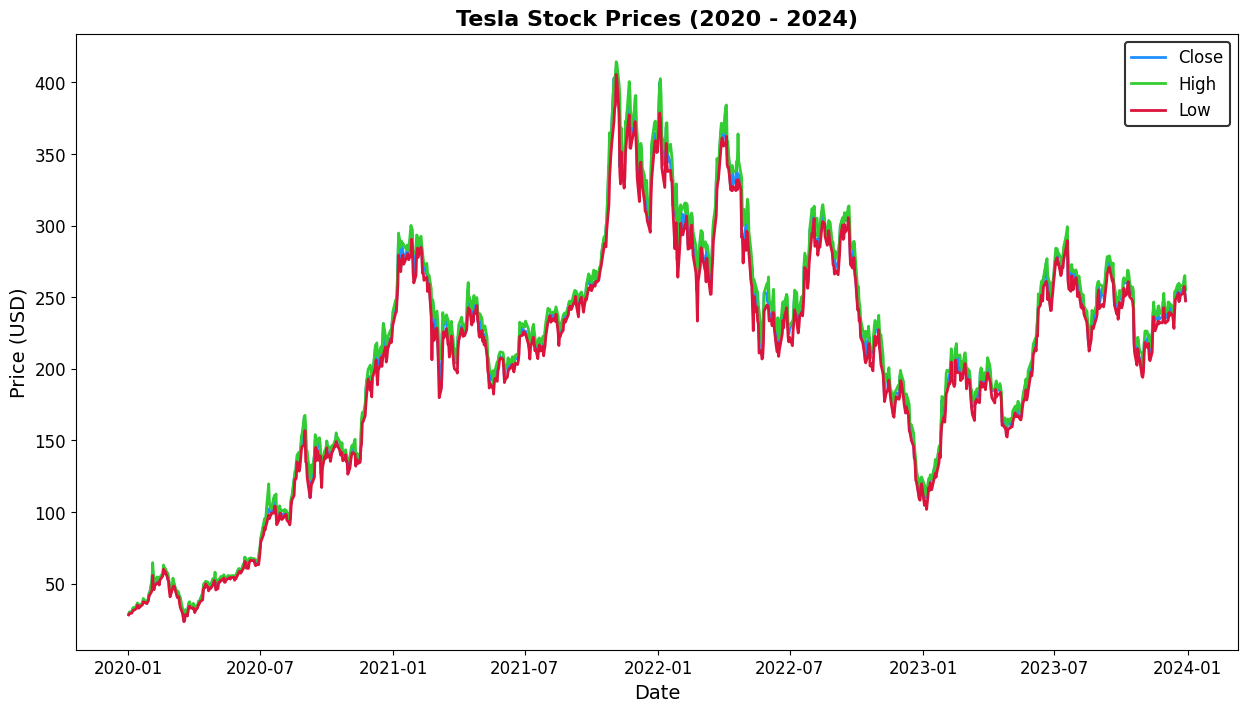

In [8]:
# Create a figure and a set of subplots
fig, ax = plt.subplots(figsize=(15, 8))

# Plot high, low, and close prices with better alpha settings for visibility
ax.plot(tesla_data.index, tesla_data['Close'], label='Close', color='dodgerblue', linewidth=2)
ax.plot(tesla_data.index, tesla_data['High'], label='High', color='limegreen', linewidth=2)
ax.plot(tesla_data.index, tesla_data['Low'], label='Low', color='crimson', linewidth=2)

# Shade the area between high and low with a lighter color
ax.fill_between(tesla_data.index, tesla_data['High'], tesla_data['Low'], color='gray', alpha=0.1)

# Customize the plot with a title and labels
ax.set_title('Tesla Stock Prices (2020 - 2024)', fontsize=16, fontweight='bold')
ax.set_xlabel('Date', fontsize=14)
ax.set_ylabel('Price (USD)', fontsize=14)

# Modify ticks for better readability
ax.tick_params(axis='both', which='major', labelsize=12)

# Add legend with a shadow
legend = ax.legend(fontsize='large', frameon=True)
legend.get_frame().set_edgecolor('black')
legend.get_frame().set_linewidth(1.5)
legend.get_frame().set_facecolor('white')
legend.get_frame().set_shadow(True)

# Improve layout
plt.tight_layout()

# Remove grid lines for a cleaner look
ax.grid(False)

# Set a light background
ax.set_facecolor('whitesmoke')

# Show the plot
plt.show()
plt.savefig('tesla image', format='png', dpi=300)


In [9]:
from graphviz import Digraph

def create_transformer_flowchart():
    dot = Digraph(comment='Transformer Model for Stock Analysis with Tweets')

    # Define the nodes
    dot.node('A', 'Tweet Data Input')
    dot.node('B', 'BERT Embeddings')
    dot.node('C', 'Transformer Encoder')
    dot.node('D', 'Feature Extraction')
    dot.node('E', 'Stock Price History')
    dot.node('F', 'Merge Features')
    dot.node('G', 'Fully Connected Layers')
    dot.node('H', 'Output (Price Prediction)')

    # Define the edges
    dot.edge('A', 'B', 'Tokenize & Embed')
    dot.edge('B', 'C', 'Encoded Sequences')
    dot.edge('C', 'D', 'Extracted Features')
    dot.edge('E', 'F', 'Historical Data')
    dot.edge('D', 'F', 'Tweet Features')
    dot.edge('F', 'G', 'Combined Features')
    dot.edge('G', 'H', 'Predicted Prices')

    # Render the graph to a file (PDF, PNG, etc.)
    dot.render('transformer_model_flowchart', format='png', cleanup=True)
    print("Flowchart created and saved as 'transformer_model_flowchart.png'.")

if __name__ == "__main__":
    create_transformer_flowchart()

Flowchart created and saved as 'transformer_model_flowchart.png'.


In [10]:
from graphviz import Digraph

def create_data_flowchart():
    dot = Digraph(comment='Flowchart for Generating and Analyzing Dummy Data')

    # Define the nodes
    dot.node('A', 'Generate Data')
    dot.node('B', '3 Imaginary Stocks')
    dot.node('C', '3 Imaginary Indexes')
    dot.node('D', '3 CEOs')
    dot.node('E', 'Assign Tweet Sentiment Weights')
    dot.node('F', 'Generate Tweets')
    dot.node('G', 'CEO 1: Positive Tweets')
    dot.node('H', 'CEO 2: Neutral Tweets')
    dot.node('I', 'CEO 3: Negative Tweets')
    dot.node('J', 'Feed Data to Transformer Model')
    dot.node('K', 'Analyze Results')

    # Define the edges
    dot.edge('A', 'B')
    dot.edge('A', 'C')
    dot.edge('A', 'D')
    dot.edge('D', 'E')
    dot.edge('E', 'F')
    dot.edge('F', 'G', label='Weighted Positive')
    dot.edge('F', 'H', label='Weighted Neutral')
    dot.edge('F', 'I', label='Weighted Negative')
    dot.edge('G', 'J')
    dot.edge('H', 'J')
    dot.edge('I', 'J')
    dot.edge('J', 'K', 'Output Analysis')

    # Render the graph to a file
    dot.render('dummy_data_flowchart', format='png', cleanup=True)
    print("Flowchart created and saved as 'dummy_data_flowchart.png'.")

if __name__ == "__main__":
    create_data_flowchart()

Flowchart created and saved as 'dummy_data_flowchart.png'.


In [11]:
import pandas as pd

# Define the lists
products = ["latest model", "innovative service", "cutting-edge solution", "revolutionary app", "next-gen technology"]
achievements = ["has just been launched", "is breaking new ground", "has shattered expectations", "is a game-changer"]
actions = ["pushing boundaries", "leading the market", "driving success", "setting new standards", "capturing new territories"]
challenges = ["economic downturns", "competitive pressures", "tightening regulations", "supply chain disruptions"]
strategies = ["pivot our focus", "leverage new opportunities", "double down on our core strengths", "diversify our approaches"]
updates = ["earnings call", "stakeholder meeting", "press release", "product reveal", "partnership announcement"]
adjectives = ["challenging", "rewarding", "transformative", "significant", "critical"]
outcomes = ["overcome these challenges", "build on these successes", "continue our growth", "maintain our market position"]
events = ["in our latest webinar", "during the recent industry conference", "in our annual report"]

# Since not all lists are of the same length, create a DataFrame carefully
# First, find the maximum length of the lists
max_length = max(len(products), len(achievements), len(actions), len(challenges),
                 len(strategies), len(updates), len(adjectives), len(outcomes), len(events))

# Extend the lists to have the same length
data = {
    "Products": products + [""] * (max_length - len(products)),
    "Achievements": achievements + [""] * (max_length - len(achievements)),
    "Actions": actions + [""] * (max_length - len(actions)),
    "Challenges": challenges + [""] * (max_length - len(challenges)),
    "Strategies": strategies + [""] * (max_length - len(strategies)),
    "Updates": updates + [""] * (max_length - len(updates)),
    "Adjectives": adjectives + [""] * (max_length - len(adjectives)),
    "Outcomes": outcomes + [""] * (max_length - len(outcomes)),
    "Events": events + [""] * (max_length - len(events)),
}

# Create DataFrame
df = pd.DataFrame(data)

# Display the DataFrame
print(df)

                Products                Achievements  \
0           latest model      has just been launched   
1     innovative service      is breaking new ground   
2  cutting-edge solution  has shattered expectations   
3      revolutionary app           is a game-changer   
4    next-gen technology                               

                     Actions                Challenges  \
0         pushing boundaries        economic downturns   
1         leading the market     competitive pressures   
2            driving success    tightening regulations   
3      setting new standards  supply chain disruptions   
4  capturing new territories                             

                          Strategies                   Updates  \
0                    pivot our focus             earnings call   
1         leverage new opportunities       stakeholder meeting   
2  double down on our core strengths             press release   
3           diversify our approaches            pr

In [14]:
from tabulate import tabulate
import yfinance as yf
import pandas as pd

table = tabulate(df, headers='keys', tablefmt='fancy_grid', showindex=False)

# Define the file path to save the table
file_path = 'optionchart.txt'

# Save the table to a file
with open(file_path, 'w') as file:
    file.write(table)

print("Table saved successfully.")

Table saved successfully.
